# Inject signals into Tabby's Star to run through Spec-match and calculate velocity shift

In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
from astropy.io import fits
import pandas as pd
from scipy.interpolate import splev, splrep
from mpmath import mp
import random
from random import seed
from random import choice
from random import uniform
import math
from mpmath import mp

In [2]:
mp.dps=100
exp_array = np.frompyfunc(mp.exp, 1, 1)

# function to insert simulated gaussians by adding a gaussian into a given location in the spectrum
def insert_gaussian(spectrum, gaussian_params, midpoint, numpoints):
    height = gaussian_params[0]
    position = gaussian_params[1] #position within segment, not index in spectrum
    FWHM = gaussian_params[2]
    offset = gaussian_params[3]
    x = np.linspace(0,numpoints-1,numpoints) # numpoints must be even
    width = FWHM/(2*np.sqrt(2*np.log(2)))    
    gauss = gaussian(x,height,position,width,offset)
    new_spect = spectrum.copy()
    new_spect[midpoint - math.floor(numpoints/2):midpoint + math.floor(numpoints/2)] = new_spect[midpoint - math.floor(numpoints/2):midpoint + math.floor(numpoints/2)] + gauss
    return new_spect

# same as above, but REMOVES the part of the data where the gaussian is inserted
def insert_gaussian_with_data_removal(spectrum, gaussian_params, midpoint, numpoints):
    height = gaussian_params[0]
    position = gaussian_params[1] #position within segment, not index in spectrum
    FWHM = gaussian_params[2]
    offset = gaussian_params[3]
    x = np.linspace(0,numpoints-1,numpoints) # numpoints must be even
    width = FWHM/(2*np.sqrt(2*np.log(2)))    
    gauss = gaussian(x,height,position,width,offset)
    new_spect = spectrum.copy()
    new_spect[midpoint - math.floor(numpoints/2):midpoint + math.floor(numpoints/2)] = gauss
    return new_spect
    
def gaussian(x,a,b,c,d): # a = height, b = position of peak, c = width, x = numpy array of x values
    f = a*exp_array((-(x-b)**2)/(2*c)**2) + d
    return f 

def chi(model, data):
    '''given two arrays of the same length, calculate chi-squared'''
    return np.sum((data - model) ** 2)

In [3]:
df = pd.read_pickle("/mnt_home/zoek/code/APF-BL-DAP/Zoe/SkyEmissionLines/exptimes.pkl")
df_sorted = df.sort_values('exptime', ascending=False, inplace=False)
fnames = df['directory'].tolist()
# list of file names
fnames_sorted = df_sorted['directory'].tolist()

APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

APF_flux_path = fnames_sorted[1]

# 3 signals in the center of 3 different orders

Star: KIC8462852


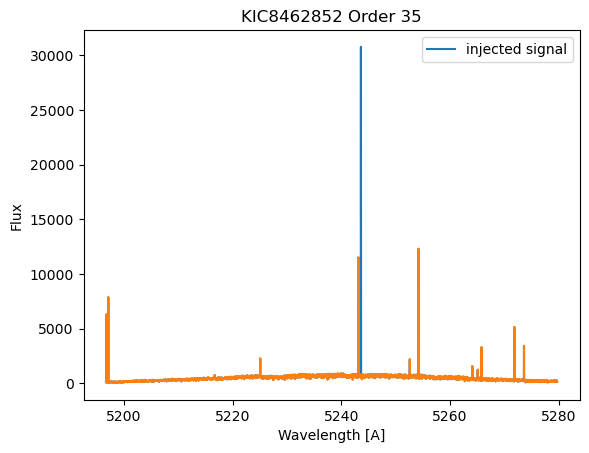

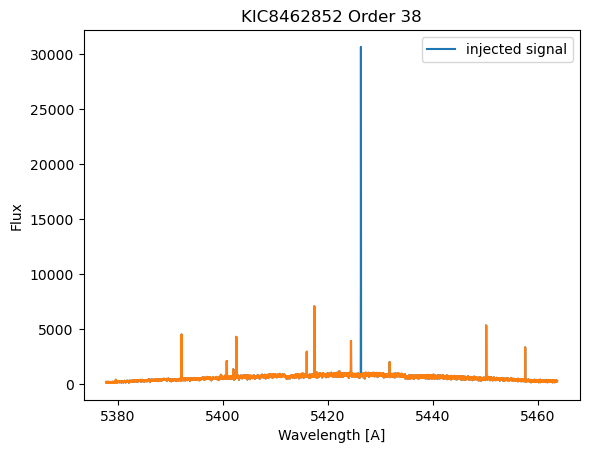

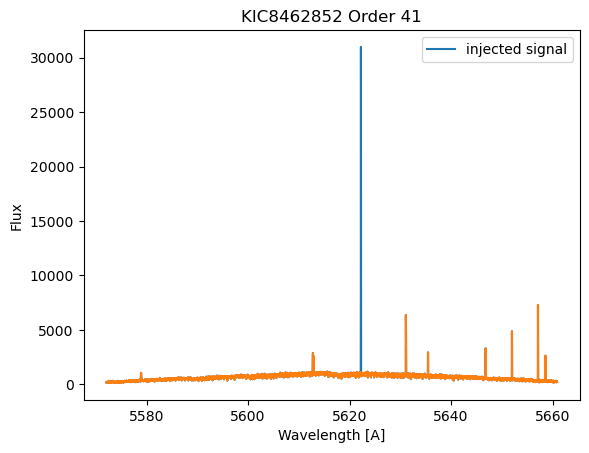

In [5]:
fl_file = fits.open(APF_flux_path)

fl_image = fl_file[0].data
header = fl_file[0].header
star = header['OBJECT']
print('Star: ' + star)

for order in np.array([35, 38, 41]):
    wl = wl_image[order]
    flux = fl_image[order]


    random.seed(seed)
    location = int(len(flux) / 2)
    height = 30000
    width = 1
    position = 15
    numpoints = 30


    spect = insert_gaussian(flux,[height, position, width, 0], location, numpoints)
    
    plt.plot(wl, spect[:-1], label = 'injected signal')
    plt.plot(wl,flux[:-1])

    plt.xlabel('Wavelength [A]')
    plt.ylabel('Flux')
    plt.title('KIC8462852 Order ' + str(order))
    plt.legend()

    plt.show()
    fl_image[order] = spect

In [6]:
hdu = fits.PrimaryHDU(fl_image)
hdul = fits.HDUList([hdu])
hdul.writeto('injections_3orders.fits')

# 3 signals in 1 order

Star: KIC8462852


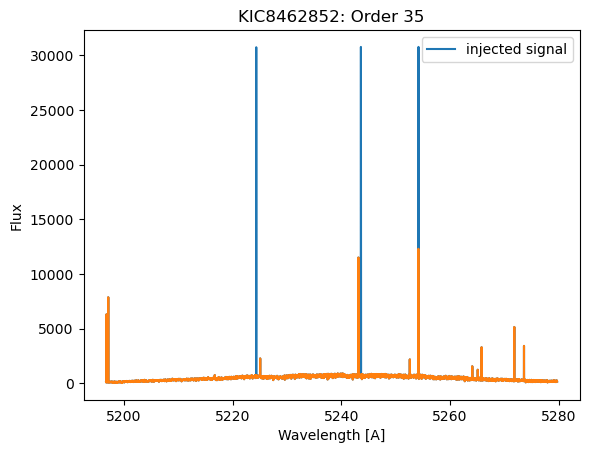

In [7]:
f = fnames_sorted[1]
    
APF_flux_path = f
fl_file = fits.open(APF_flux_path)

fl_image = fl_file[0].data
header = fl_file[0].header
star = header['OBJECT']
print('Star: ' + star)

order = 35

wl = wl_image[order]
flux = fl_image[order]

spect = flux

for location in np.array([1300, int(len(flux) / 2), len(flux) - 1700]):
    height = 30000
    width = 1
    position = 15
    numpoints = 30


    spect = insert_gaussian(spect,[height, position, width, 0], location, numpoints)

plt.plot(wl, spect[:-1], label = 'injected signal')
plt.plot(wl,flux[:-1])

plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('KIC8462852: Order ' + str(order))
plt.legend()

plt.show()
fl_image[order] = spect

In [8]:
hdu = fits.PrimaryHDU(fl_image)
hdul = fits.HDUList([hdu])
hdul.writeto('injections_1order.fits')

# Check to see if everything works

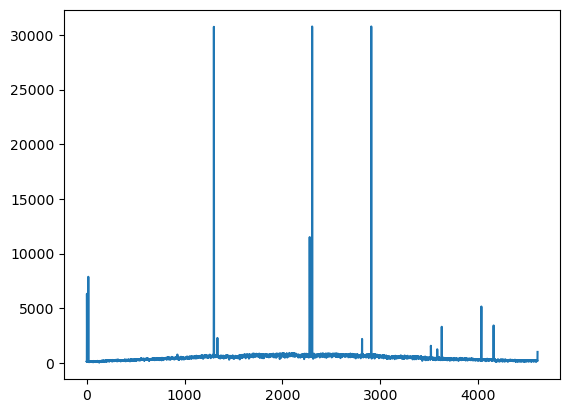

In [16]:
fl_file = fits.open('injections_1order.fits')
fl_image = fl_file[0].data
plt.plot(fl_image[35])
plt.show()